# Tensorflow Linear Classifier Example

## Classification on : Pima Indians Diabetes Dataset

### Click [here](https://www.kaggle.com/uciml/pima-indians-diabetes-database/data) to download the dataset



### 1. First save the dataset `diabetes.csv` and this notebook in the same folder.
### 2. Import this csv file using `pandas` and view its columns.


In [1]:
import pandas as pd

diabetes = pd.read_csv('diabetes.csv')

In [2]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Here, the last column `Outcome` is the final output or the prediction whether the person is suffering from diabetes or not. 

#### In this dataset, it is easy that we can predict the `Age` column will help us to classify our data because it can be a continuous feature column. Let's plot a graph to check our assumption.

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

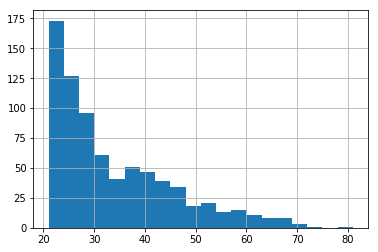

In [4]:
diabetes['Age'].hist(bins=20)

## Now let's normalize this dataset.

* We'll not include `Age` and `Outcome` because Age is our continuous feature column and Outcome is the final result.

In [5]:
cols_to_norm = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction']

In [6]:
diabetes[cols_to_norm] = diabetes[cols_to_norm].apply(lambda x : (x - x.min()) / (x.max() - x.min()))

In [7]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1


## Covert this data into feature and numeric columns using Tensorflow

In [8]:
import tensorflow as tf

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [9]:
pregnancies          = tf.feature_column.numeric_column('Pregnancies')
glucose              = tf.feature_column.numeric_column('Glucose')
blood_pressure       = tf.feature_column.numeric_column('BloodPressure')
skin_thickness       = tf.feature_column.numeric_column('SkinThickness')
insulin              = tf.feature_column.numeric_column('Insulin')
bmi                  = tf.feature_column.numeric_column('BMI')
diabetes_pedigree_fn = tf.feature_column.numeric_column('DiabetesPedigreeFunction')
age                  = tf.feature_column.numeric_column('Age')

## Same for non continuous features
* First we'll do this using `vocabulary list` and then use `hash buckets`

In [10]:
assigned_group = tf.feature_column.categorical_column_with_vocabulary_list('Outcome', ['0', '1'])

In [11]:
# assigned_group = tf.feature_column.categorical_column_with_hash_bucket('Outcome', hash_bucket_size=2)

## Creating age bucket

In [12]:
age_bucket = tf.feature_column.bucketized_column(age, boundaries=[20,30,40,50,60,70,80])

In [13]:
feat_cols = [pregnancies, glucose, blood_pressure, skin_thickness, insulin, bmi, diabetes_pedigree_fn, age_bucket]

## Now we'll perform `train-test-split` using `Scikit Learn`
  
  
* We want `Outcome` column to be in Y Data and everything else in X Data

* Also we'll use `Outcome` column for labels

In [14]:
x_data = diabetes.drop('Outcome', axis=1)

x_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33


In [15]:
labels = diabetes['Outcome']

labels.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(x_data, labels, test_size=0.3, random_state=101)

## Creating our Model

* Here we have used `pandas` to import the csv file, we'll use `pandas_input_fn` in input function.

In [18]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train, y=y_train, batch_size=10, num_epochs=1000, shuffle=True)

In [19]:
model = tf.estimator.LinearClassifier(feature_columns=feat_cols, n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpx7jo05ow', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7ff3f7480f28>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


## Training the model

In [20]:
model.train(input_fn=input_func, steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmpx7jo05ow/model.ckpt.
INFO:tensorflow:loss = 6.931472, step = 1
INFO:tensorflow:global_step/sec: 65.1085
INFO:tensorflow:loss = 5.881585, step = 101 (1.545 sec)
INFO:tensorflow:global_step/sec: 40.5521
INFO:tensorflow:loss = 5.660893, step = 201 (2.493 sec)
INFO:tensorflow:global_step/sec: 93.6402
INFO:tensorflow:loss = 4.3770843, step = 301 (1.041 sec)
INFO:tensorflow:global_step/sec: 108.667
INFO:tensorflow:loss = 4.984219, step = 401 (0.916 sec)
INFO:tensorflow:global_step/sec: 101.229
INFO:tensorflow:loss = 5.106059, step = 501 (0.994 sec)
INFO:tensorflow:global_step/sec: 87.1394
INFO:tensorflow:loss = 5.789013, step = 601 (1.139 sec)
INFO:tensorflow:global_step/sec: 93.0008
INFO:tensorflow:loss =

## Evaluating the model

In [21]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test, y=y_test, batch_size=10, num_epochs=1, shuffle=False)

In [22]:
results = model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-06-17-17:35:41
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpx7jo05ow/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-06-17-17:35:44
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.7316017, accuracy_baseline = 0.64935064, auc = 0.79897124, auc_precision_recall = 0.650552, average_loss = 0.52615964, global_step = 1000, label/mean = 0.35064936, loss = 5.0642867, precision = 0.63380283, prediction/mean = 0.37213582, recall = 0.5555556


In [23]:
results

{'accuracy': 0.7316017,
 'accuracy_baseline': 0.64935064,
 'auc': 0.79897124,
 'auc_precision_recall': 0.650552,
 'average_loss': 0.52615964,
 'global_step': 1000,
 'label/mean': 0.35064936,
 'loss': 5.0642867,
 'precision': 0.63380283,
 'prediction/mean': 0.37213582,
 'recall': 0.5555556}

## Making Predictions

* Since we don't have separate data to predict, we'll use test split to predict the results.

In [24]:
pred_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test, batch_size=10, num_epochs=1, shuffle=False)

In [26]:
predictions = model.predict(pred_input_func)

predictions = list(predictions)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpx7jo05ow/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


## Now let's compare this predictions with original data: `y_test`

* First print the first 5 elements of both `predictions` and `y_test` then compare the outputs.

In [27]:
predictions[:5]

[{'class_ids': array([1]),
  'classes': array([b'1'], dtype=object),
  'logistic': array([0.5301476], dtype=float32),
  'logits': array([0.12073684], dtype=float32),
  'probabilities': array([0.46985242, 0.5301476 ], dtype=float32)},
 {'class_ids': array([1]),
  'classes': array([b'1'], dtype=object),
  'logistic': array([0.64299196], dtype=float32),
  'logits': array([0.588374], dtype=float32),
  'probabilities': array([0.357008  , 0.64299196], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'logistic': array([0.41255456], dtype=float32),
  'logits': array([-0.3534149], dtype=float32),
  'probabilities': array([0.58744544, 0.41255456], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'logistic': array([0.31345198], dtype=float32),
  'logits': array([-0.7840301], dtype=float32),
  'probabilities': array([0.68654805, 0.31345198], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array([b'0'], dtype=obj

In [28]:
y_test.head()

766    1
748    1
42     0
485    1
543    0
Name: Outcome, dtype: int64

* Here the index of first element in `y_test` is 766 and the Outcome is `1`
* Also the outcome at index 42 and the element 3 is `0`.
* We'll compare these indexes with our `predictions`.

In [29]:
print('Comparing First Element:', 'Predictions:' ,predictions[0]['class_ids'][0], '&& y_test: ',y_test[766])
print('Probability', predictions[0]['probabilities'].max())

Comparing First Element: Predictions: 1 && y_test:  1
Probability 0.5301476


In [30]:
print('Comparing Third Element:', 'Predictions:' ,predictions[2]['class_ids'][0], '&& y_test: ',y_test[42])
print('Probability', predictions[2]['probabilities'].max())

Comparing Third Element: Predictions: 0 && y_test:  0
Probability 0.58744544
